# Vincent Purcell
##### HW2 - Sensitivity Analysis #####
Some code was taken and modified from Professor Brietzman's code

Import Libraries and download data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']

Split Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.1086,0.1887,0.1868,0.02564,0.2376,0.09206
461,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,0.2061,0.05623,...,36.040,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,0.1631,0.06155,...,15.850,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.010,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.10170,0.2369,0.06599
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.053640,0.1847,0.05338,...,16.840,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.086910,0.2094,0.05581,...,25.730,28.64,170.30,2009.0,0.1353,0.3235,0.3617,0.18200,0.3070,0.08255
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.064620,0.1935,0.06303,...,19.560,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.027550,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022
474,10.880,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.015710,0.1861,0.06837,...,11.940,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800


### Support Vector Classifier + Confusion Matrix

<AxesSubplot:>

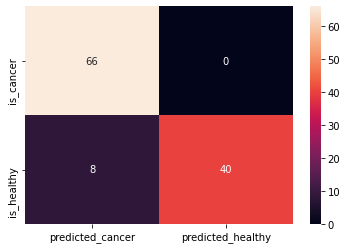

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion, annot=True)

### MLP Classifier + Confusion Matrix

<AxesSubplot:>

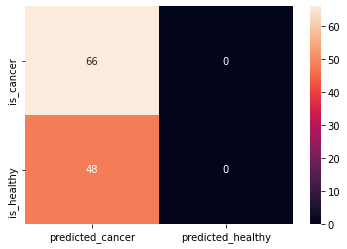

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,2), max_iter=2000)
mlp.fit(X_train,y_train)
y_predict = mlp.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion, annot=True)

### Support Vector Regression + Sensitivity Analysis

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(X_train, y_train)
y_predict = svr_poly.predict(X_test)

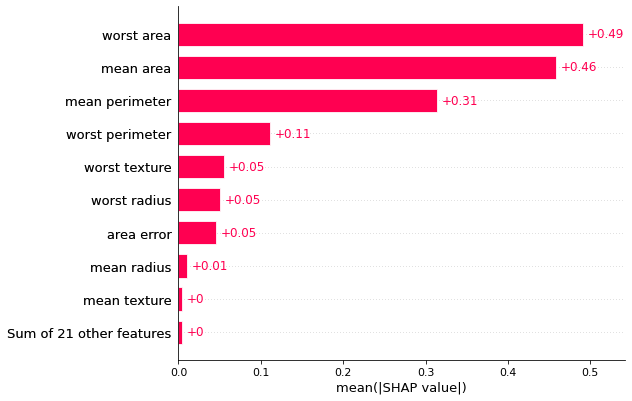

In [9]:
import shap
explainer = shap.explainers.Permutation(svr_poly.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)

## MLP Regression + Sensitivity Analysis

In [10]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
y_predict = mlp_regr.predict(X_test)

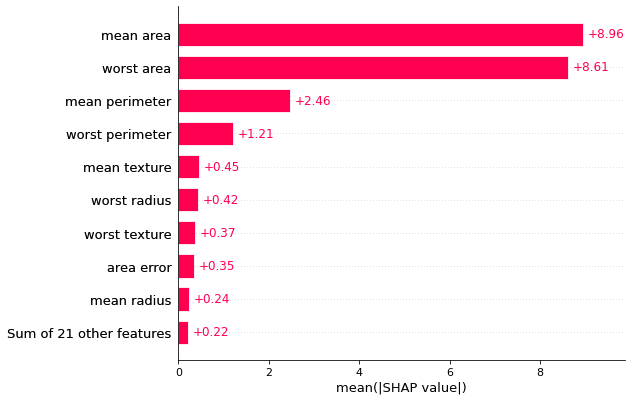

In [11]:
explainer = shap.explainers.Permutation(mlp_regr.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)